In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Load Data ---
try:
    # Using a raw string (r'') to prevent file path warnings
    df = pd.read_csv(r'E:\cognizant hackathon\Insurance_churn_Prediction\data\Train.csv')
    print("Train.csv loaded successfully!")
except FileNotFoundError:
    print("Error: Train.csv not found. Please check the file path.")
    exit()

df.describe()


Train.csv loaded successfully!


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [3]:
print(df.isnull().sum())

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64


Generated plot: 1_class_distribution.png


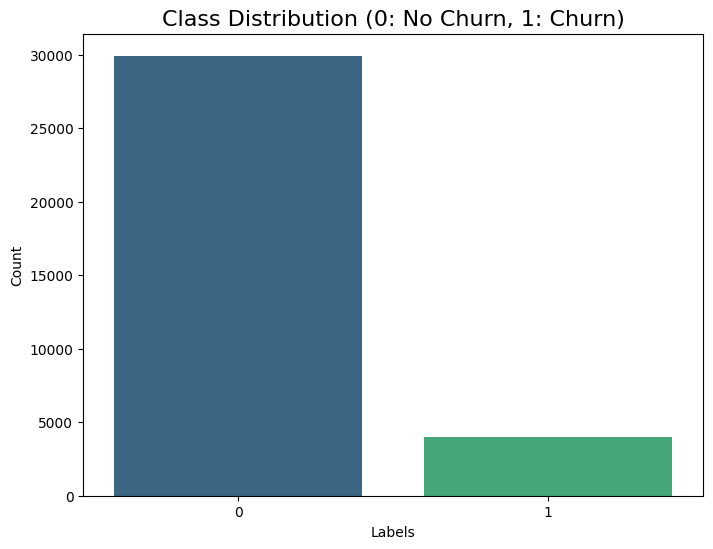

In [4]:
# --- 1. Class Distribution ---
plt.figure(figsize=(8, 6))
sns.countplot(x='labels', data=df, palette='viridis', hue='labels', legend=False)
plt.title('Class Distribution (0: No Churn, 1: Churn)', fontsize=16)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.savefig('1_class_distribution.png')
print("Generated plot: 1_class_distribution.png")
plt.show()

Generated plot: 2_feature_distributions.png


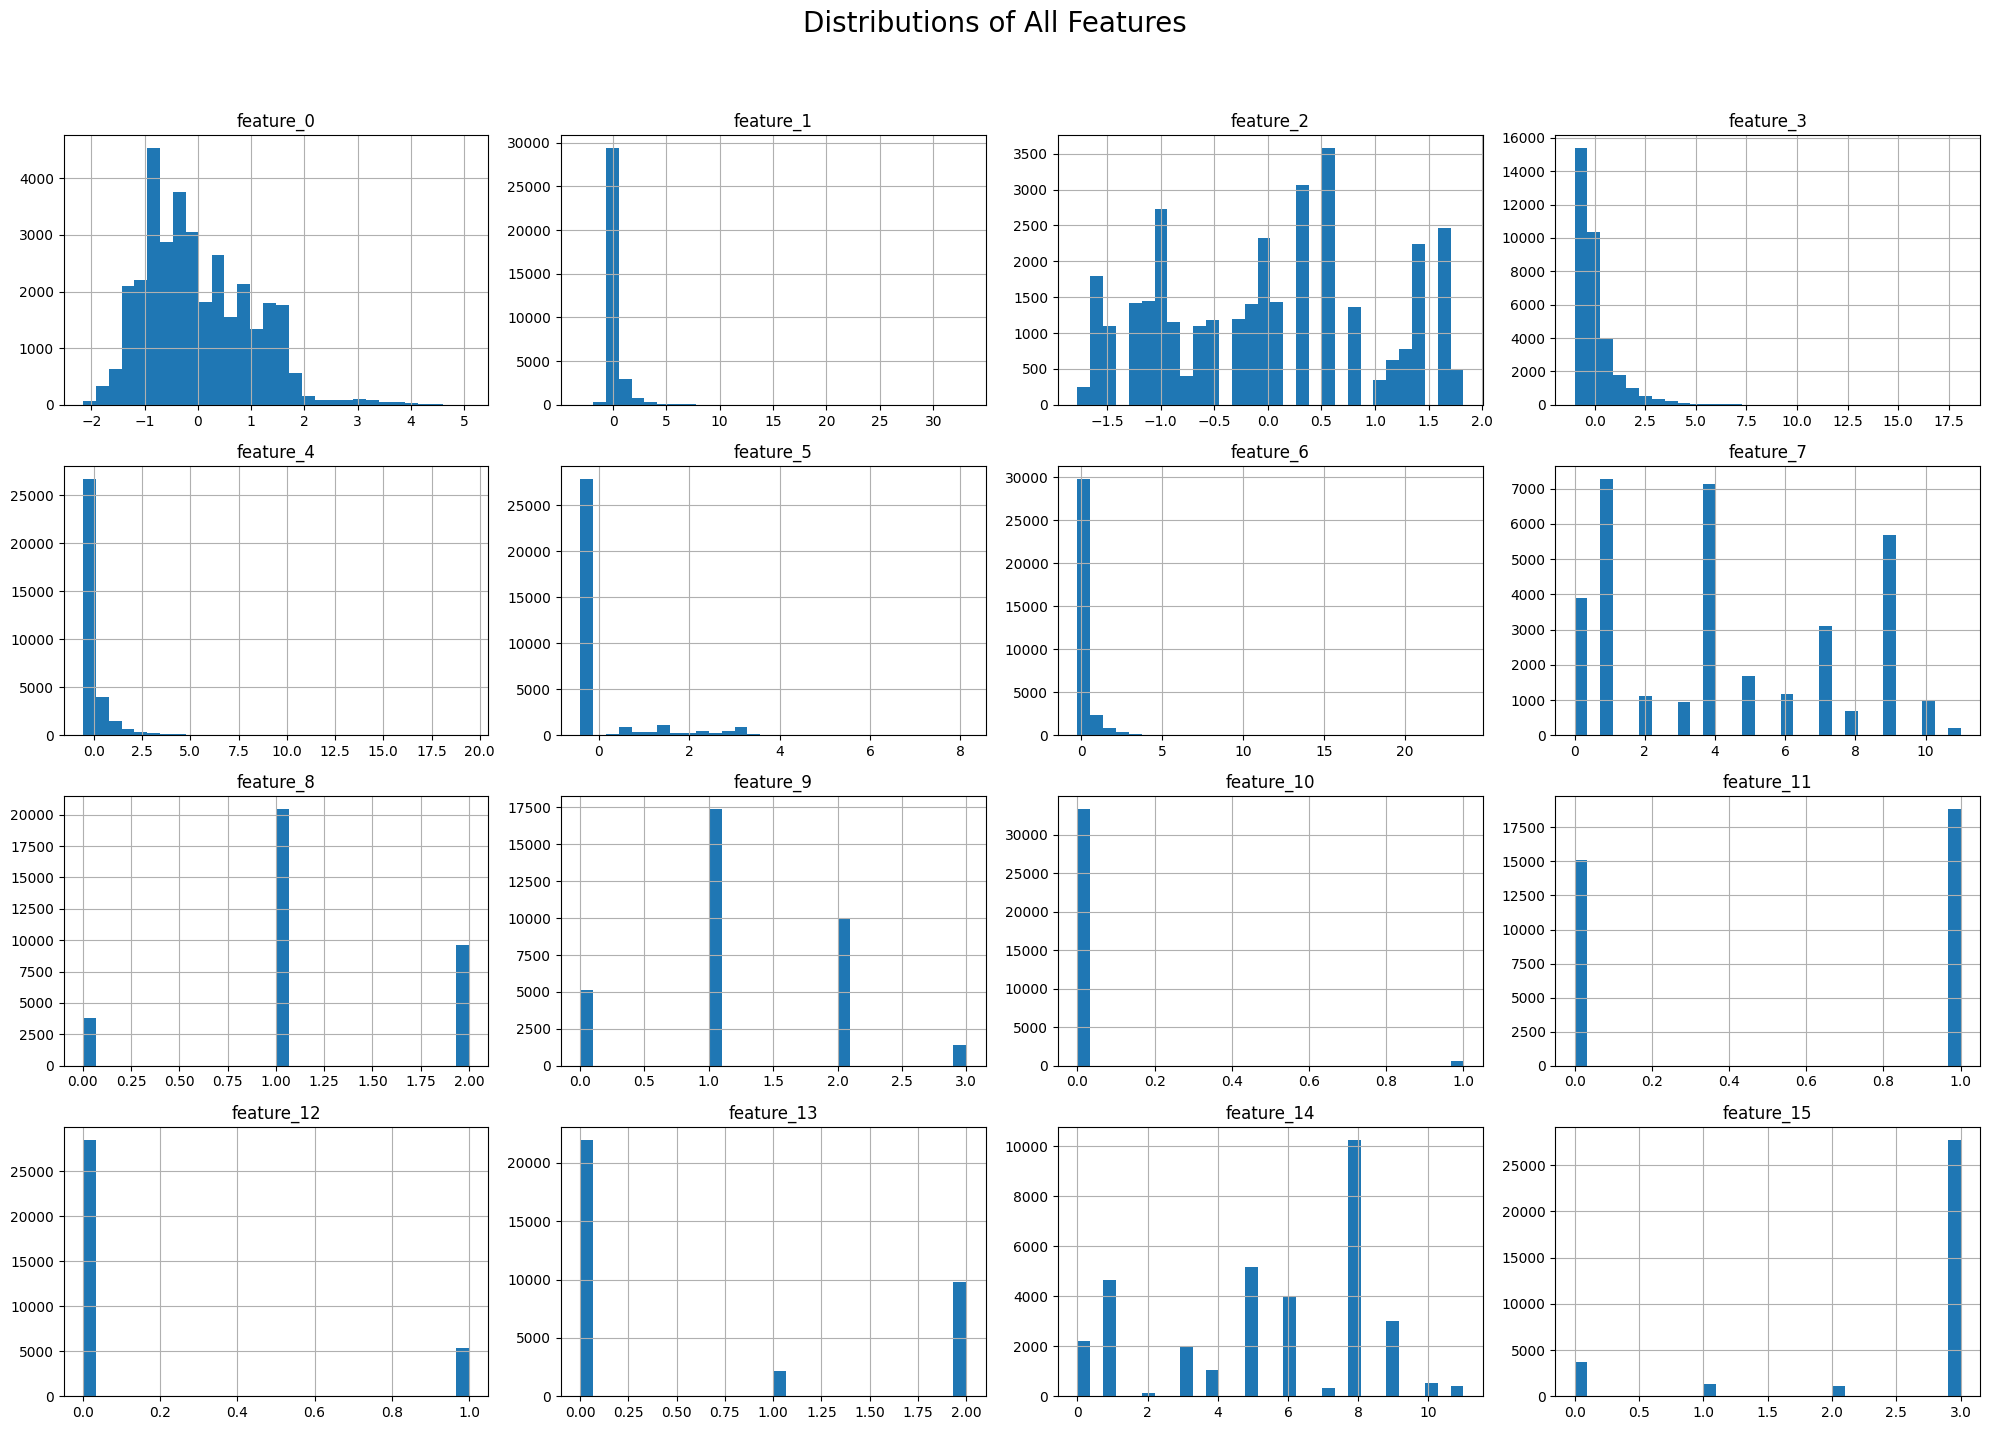

In [5]:
# --- 2. Feature Distributions (Histograms) ---
features = df.drop('labels', axis=1)
features.hist(bins=30, figsize=(20, 15), layout=(-1, 4))
plt.suptitle("Distributions of All Features", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('2_feature_distributions.png')
print("Generated plot: 2_feature_distributions.png")
plt.show()

Generated plot: 3_correlation_heatmap.png


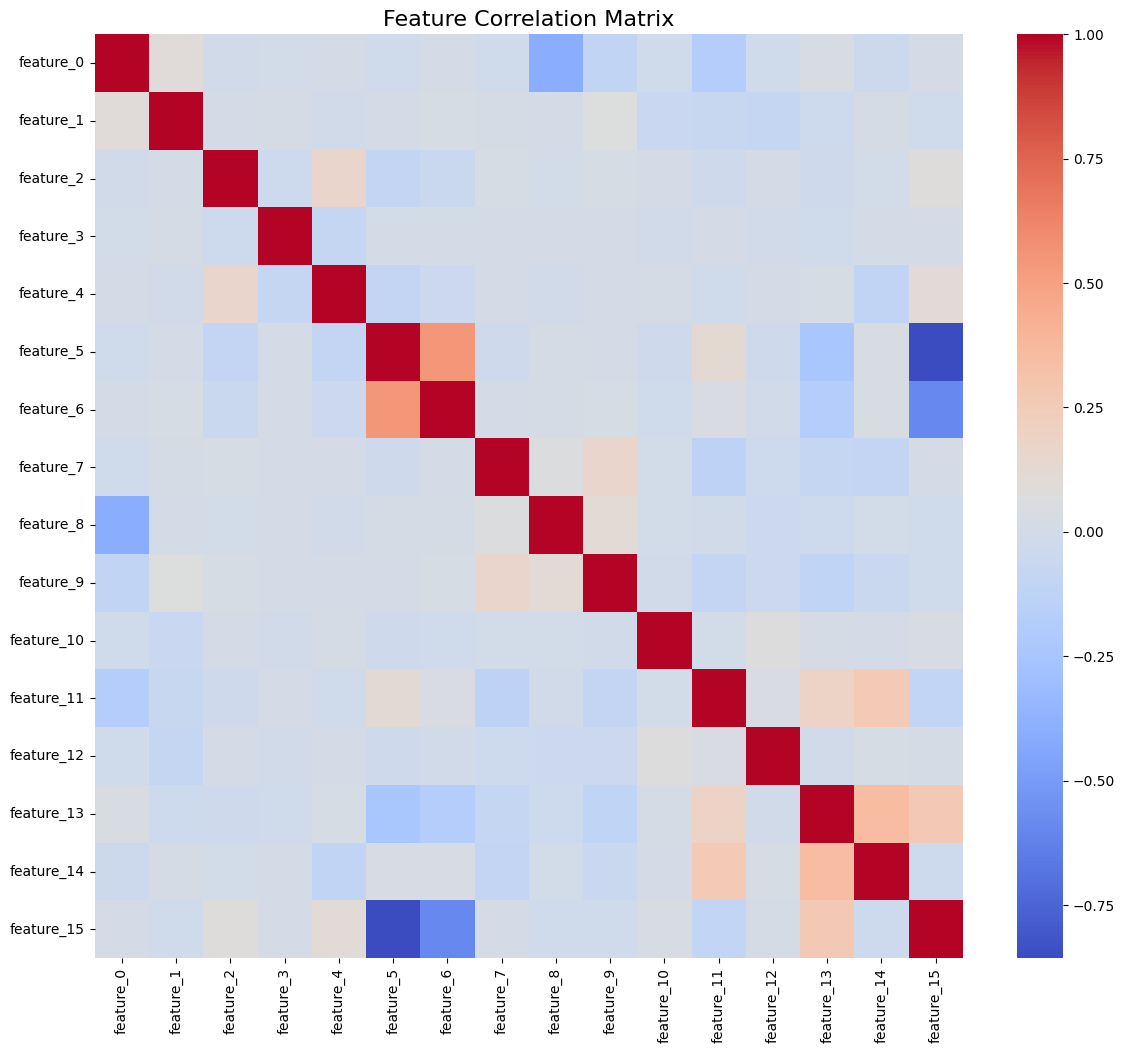

In [6]:
# --- 3. Correlation Heatmap ---
plt.figure(figsize=(14, 12))
sns.heatmap(features.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix", fontsize=16)
plt.savefig('3_correlation_heatmap.png')
print("Generated plot: 3_correlation_heatmap.png")
plt.show()

Generated plot: 4_boxplots_by_label.png


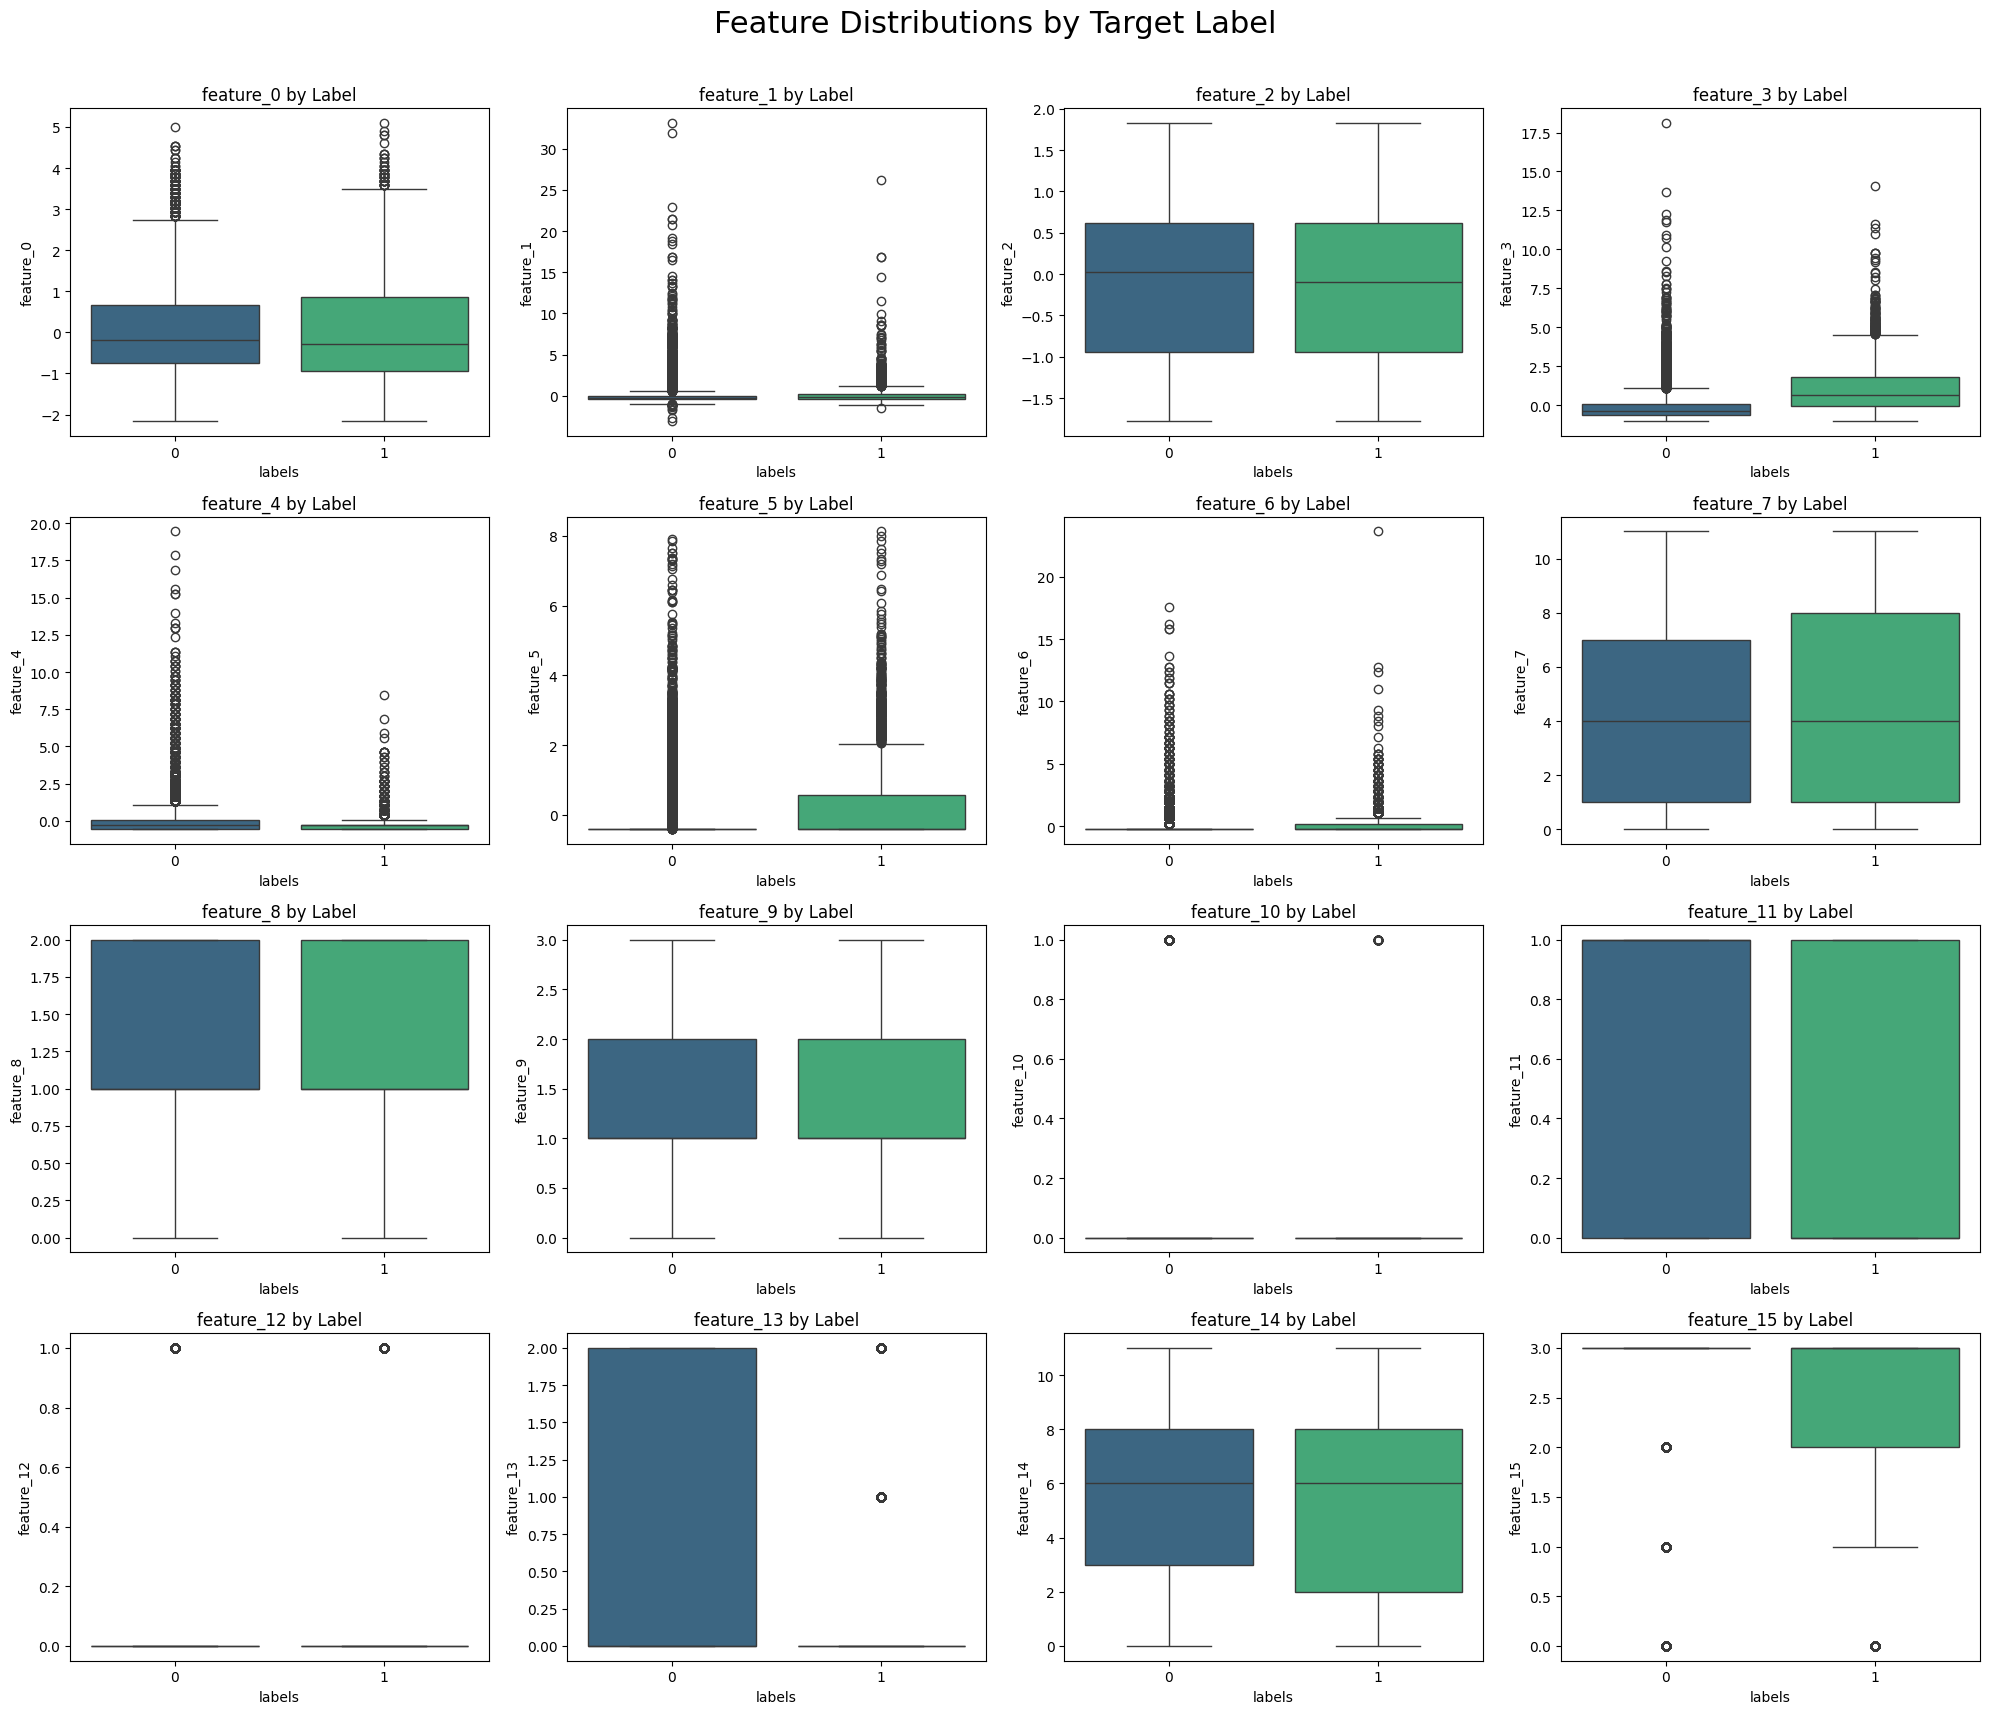

In [7]:
# --- 4. Box Plots by Target Label (UPDATED) ---
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.flatten()
for i, feature in enumerate(features.columns):
    # UPDATED LINE: Added hue='labels' and legend=False to resolve the warning
    sns.boxplot(x='labels', y=feature, data=df, ax=axes[i], palette='viridis', hue='labels', legend=False)
    axes[i].set_title(f'{feature} by Label')

plt.suptitle("Feature Distributions by Target Label", fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('4_boxplots_by_label.png')
print("Generated plot: 4_boxplots_by_label.png")
plt.show()